Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Multiple targets vavriables

Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [2]:
np.random.seed(42)
# Coefficeints that we will try to predict
# coefficients = np.array([1,-4,2])
coefficients = np.random.uniform(-10, 10, 3) 

def f(x, coeffs = np.array([1,-4,2]), jitter = 2000):
    """
    Function to evaluate a polynomial function.
        Can also add jitter and noise.
    
    ::param x: (float) 
    ::param coeffs: (np.array), coeffs of polynomial, ,default = [1,-4,2]
    ::param jitter: (float), uniform half range of noise, default = 0
    ::return: (float)
    """
    return np.polyval(np.flip(coeffs), x) + np.random.uniform(-jitter,jitter, 1)[0]


def simulate_x_values(minimum = -10, maximum = 10, length = 1000):
    """
    Function to create a list of random numbers.
        Sorted so the smallest x-values appear first, making it easier to plot.
    
    ::param minimum: (float), default -10
    ::param maximum: (float), default 10
    ::param lenth: (int), length of returned list, default 100
    ::return: (list[float]), sorted in ascending order
    """
    return np.sort(np.random.uniform(minimum, maximum, length)) + np.random.uniform(-3,3, 1)[0]


In [85]:
X_, y_ = make_regression(
    n_samples = 2000,
    n_features = 2,
    n_informative = 12,
    bias = 0,
    noise = 0
)

X__, y__ = make_regression(
    n_samples = 2000,
    n_features = 2,
    n_informative = 24,
    bias = 10,
    noise = .5
)



In [86]:
X = np.vstack((X_, X__))
y = np.abs(np.concatenate((y_, y__*2)))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

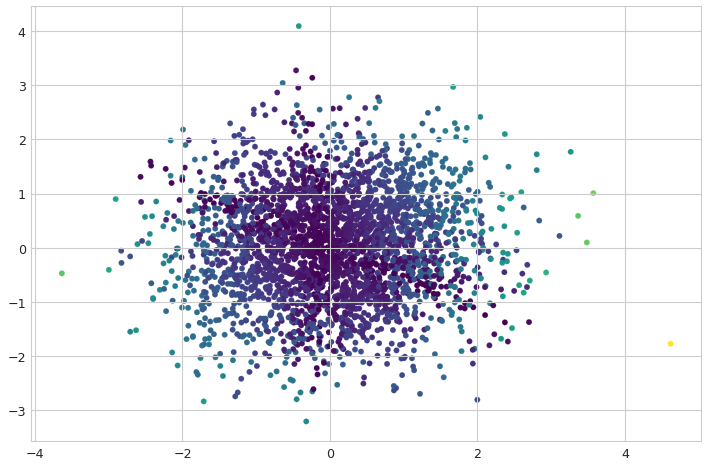

In [88]:
# Training data
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)

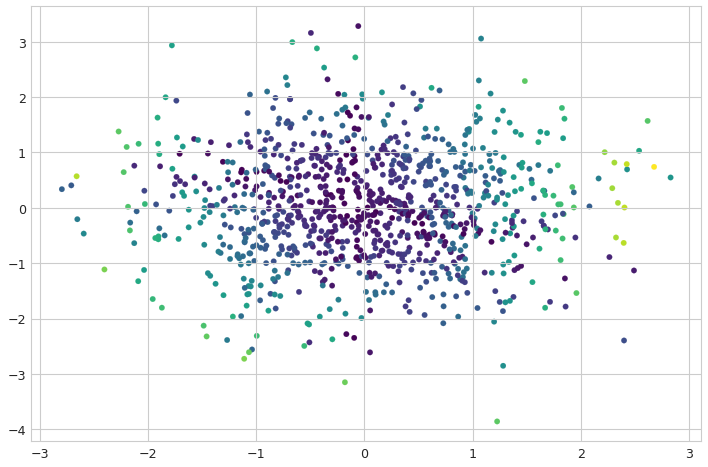

In [89]:
# Test data
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = y_test)

# Complex Valued Linear Regression

In [90]:
clr = ComplexLinearRegression(n_iter=10000)

clr.fit(X_train, y_train)

100%|██████████| 10000/10000 [14:43<00:00, 11.32it/s]


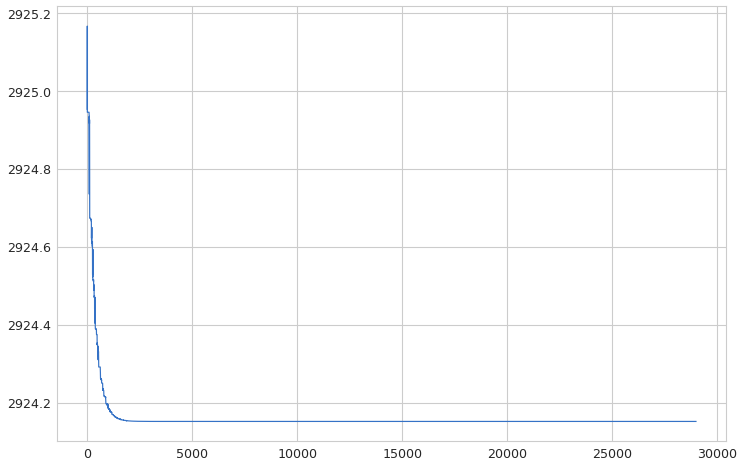

In [91]:
# Plotting loss
plt.plot(clr.loss[1000:])

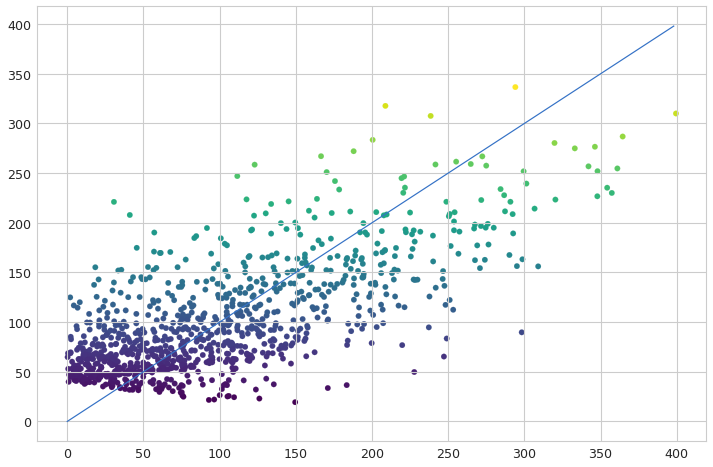

In [92]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = clr.predict(X_test), c = clr.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [93]:
# Plot gradient path of variables
#history = clr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
#    plt.xlabel("Real Value")
#    plt.ylabel("Imaginary Value")
#    plt.title(f"{j} dimension path, with step count.")
#
#    plt.show()

In [94]:
print(f"MSE: {sum((y_test - clr.predict(X_test))**2)/len(y_test)}")

MSE: 2840.934175861073


# Compare to Real valued Linear Regression

In [95]:
lr = LinearRegression(alpha = 0.01, n_iter=1000)

lr.fit(X_train, y_train)

100%|██████████| 1000/1000 [00:21<00:00, 46.79it/s]


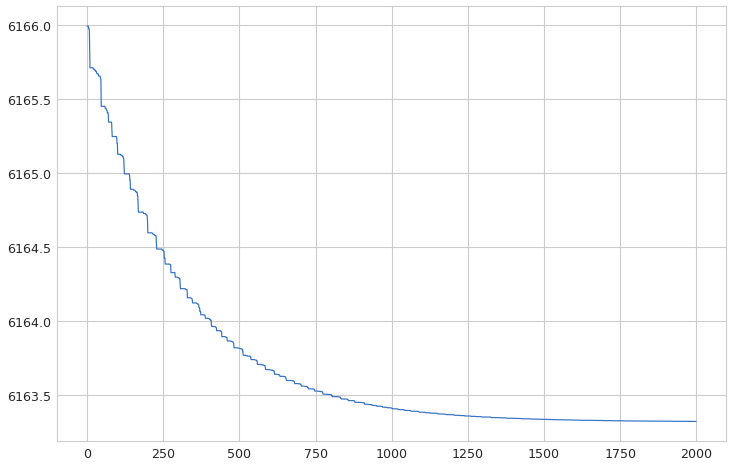

In [96]:
# Plotting loss
plt.plot(lr.loss[1000:])

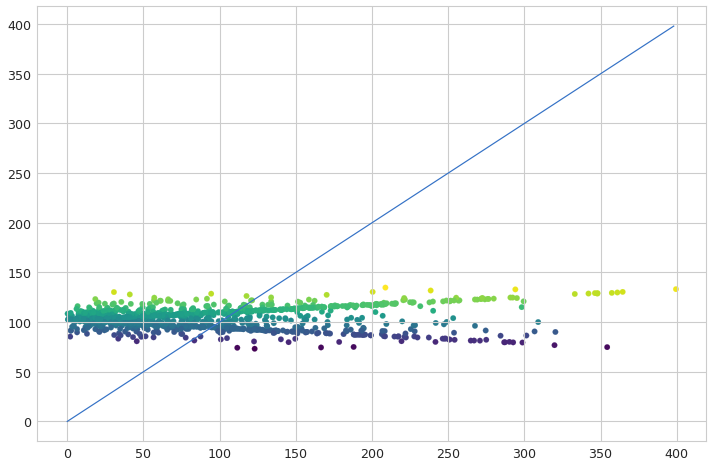

In [97]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = lr.predict(X_test), c = lr.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [98]:
# Plot gradient path of variables
#history = lr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
#    plt.xlabel("Iteration")
#    plt.ylabel("Real Value")
#    plt.title(f"{j} dimension path, with step count.")
#    
#    plt.show()

In [99]:
print(f"MSE: {sum((y_test - lr.predict(X_test))**2)/len(y_test)}")

MSE: 5711.8550095638175


# Compare to Real valued Sklearn Linear Regression

MSE: 5712.06091737137


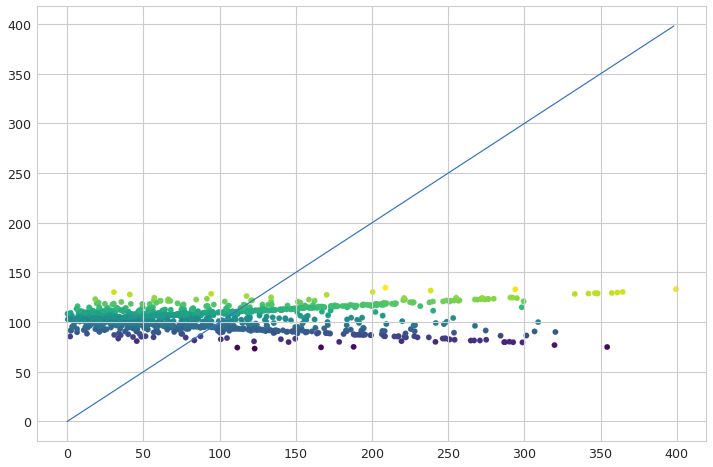

In [100]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = lin_r.predict(X_test), c = lin_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - lin_r.predict(X_test))**2)/len(y_test)}")

# Compare to non-linear Regression

### SGDRegressor

MSE: 5708.391585075903


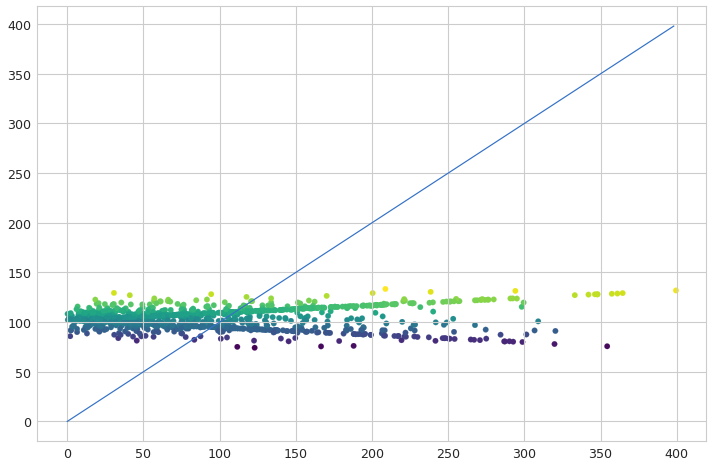

In [101]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = sgd_r.predict(X_test), c = sgd_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - sgd_r.predict(X_test))**2)/len(y_test)}")

### MLPRegressor

/home/daire/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 2477.2294600734467


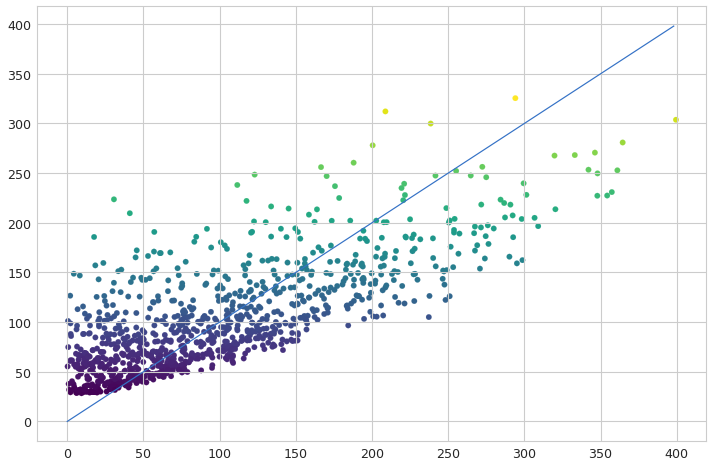

In [102]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = mlp_r.predict(X_test), c = mlp_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - mlp_r.predict(X_test))**2)/len(y_test)}")

### SVM

MSE: 2629.6756642281584


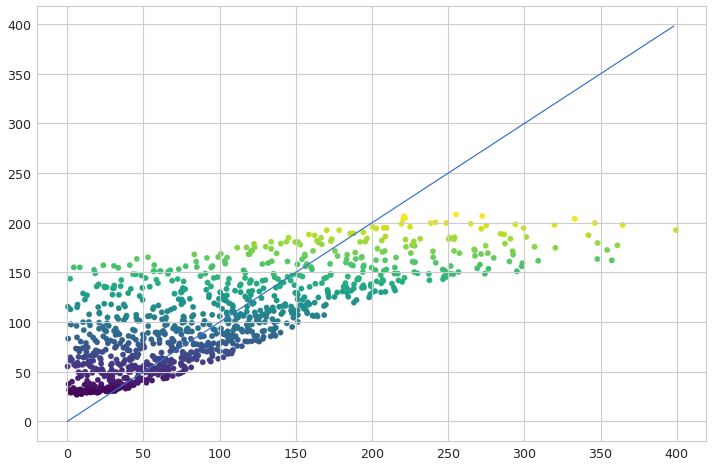

In [103]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = svm_r.predict(X_test), c = svm_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - svm_r.predict(X_test))**2)/len(y_test)}")

### RandomForestRegressor

MSE: 2662.094454716165


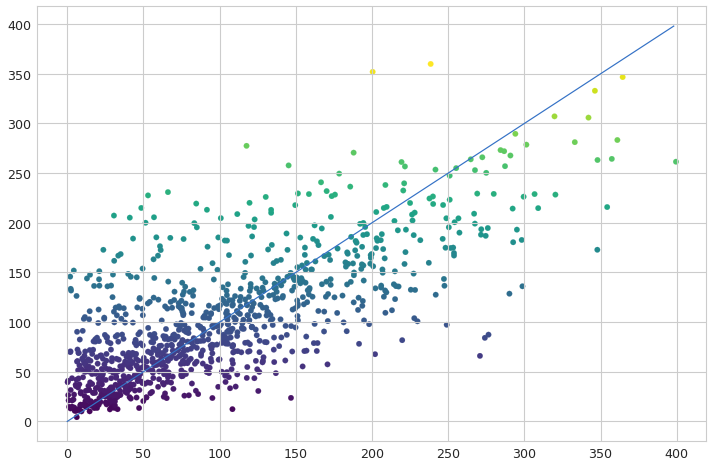

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = rf_r.predict(X_test), c = rf_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - rf_r.predict(X_test))**2)/len(y_test)}")